<a href="https://colab.research.google.com/github/SimranShaikh20/Scrape-ML/blob/main/ChartsForEmotionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Add Some more charts for better Understing

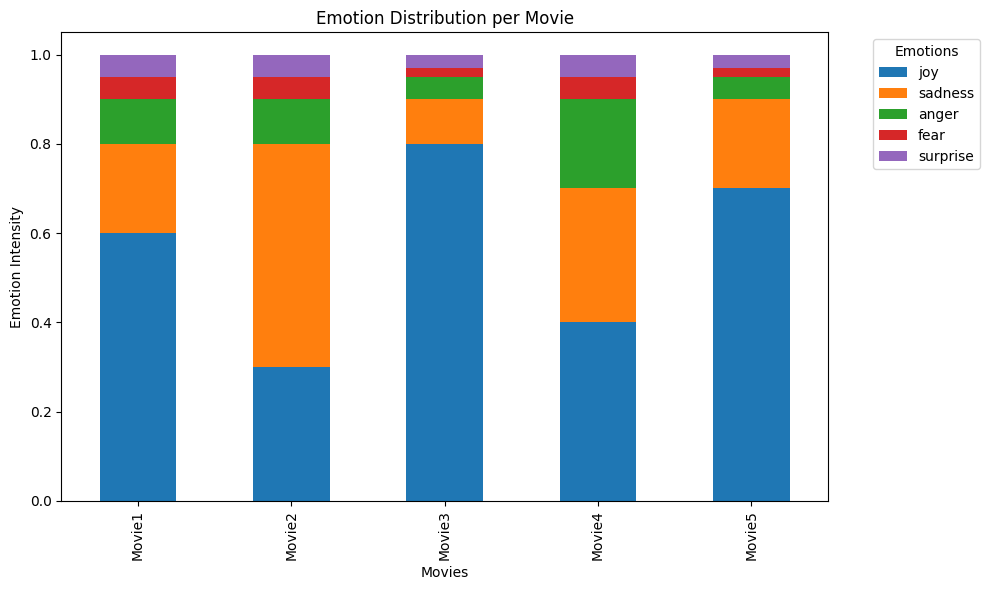

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume we have a DataFrame 'df' with columns: 'movie', 'joy', 'sadness', 'anger', 'fear', 'surprise'
# This would be the result of your text analysis

# Sample data (replace this with your actual data)
data = {
    'movie': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'],
    'joy': [0.6, 0.3, 0.8, 0.4, 0.7],
    'sadness': [0.2, 0.5, 0.1, 0.3, 0.2],
    'anger': [0.1, 0.1, 0.05, 0.2, 0.05],
    'fear': [0.05, 0.05, 0.02, 0.05, 0.02],
    'surprise': [0.05, 0.05, 0.03, 0.05, 0.03]
}

df = pd.DataFrame(data)

# 1. Stacked Bar Chart of Emotions per Movie
df.set_index('movie').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Emotion Distribution per Movie')
plt.xlabel('Movies')
plt.ylabel('Emotion Intensity')
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

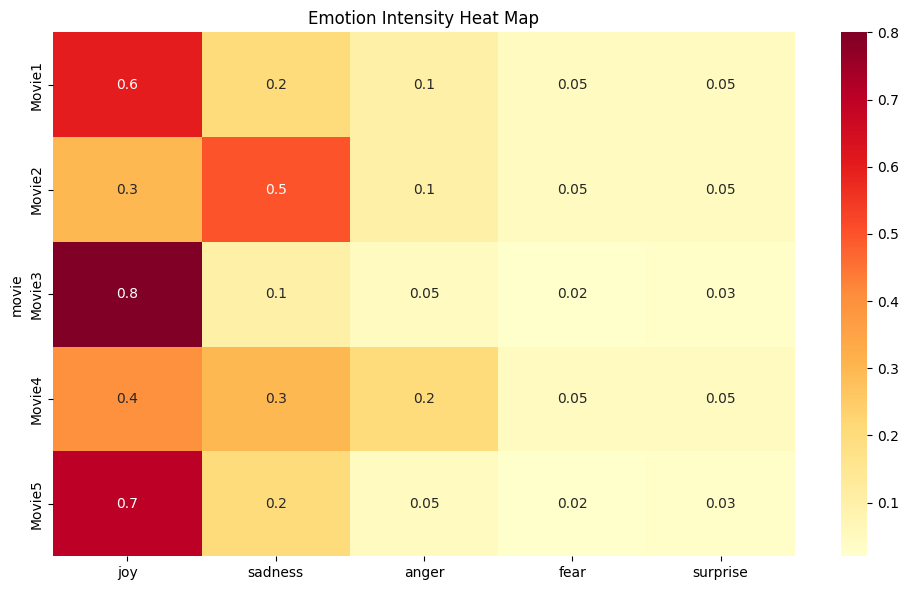

In [2]:
# 2. Emotion Intensity Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('movie'), annot=True, cmap='YlOrRd')
plt.title('Emotion Intensity Heat Map')
plt.tight_layout()
plt.show()

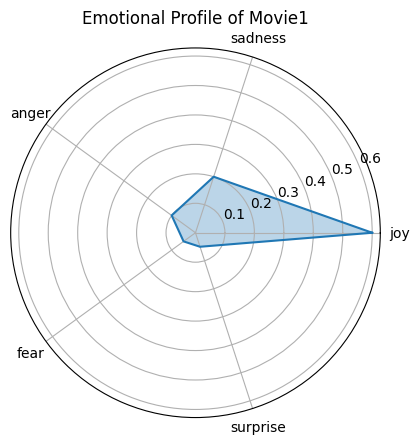

In [3]:
# 3. Radar Chart of Emotional Profile
emotions = df.columns[1:]
values = df.iloc[0, 1:].values.flatten().tolist()
values += values[:1]

angles = [n / float(len(emotions)) * 2 * 3.141593 for n in range(len(emotions))]
angles += angles[:1]

plt.polar(angles, values)
plt.fill(angles, values, alpha=0.3)
plt.xticks(angles[:-1], emotions)
plt.title('Emotional Profile of ' + df.iloc[0]['movie'])
plt.show()

<Figure size 1000x600 with 0 Axes>

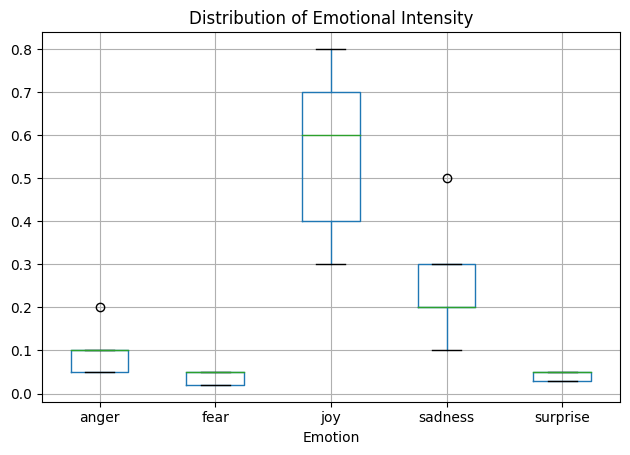

In [4]:

# 4. Box Plot of Emotional Variance
plt.figure(figsize=(10, 6))
df.melt(id_vars=['movie'], var_name='Emotion', value_name='Intensity').boxplot(column='Intensity', by='Emotion')
plt.title('Distribution of Emotional Intensity')
plt.suptitle('')
plt.tight_layout()
plt.show()

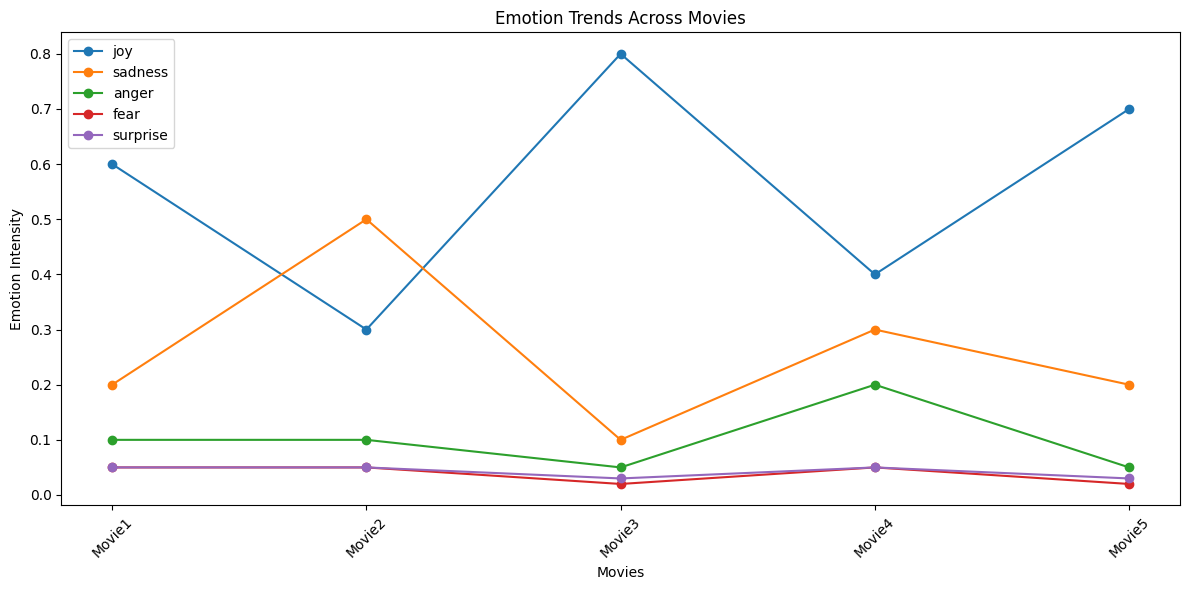

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming we have the same DataFrame 'df' as before

# 5. Emotion Trend Line Graph
plt.figure(figsize=(12, 6))
for emotion in ['joy', 'sadness', 'anger', 'fear', 'surprise']:
    plt.plot(df['movie'], df[emotion], marker='o', label=emotion)
plt.title('Emotion Trends Across Movies')
plt.xlabel('Movies')
plt.ylabel('Emotion Intensity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

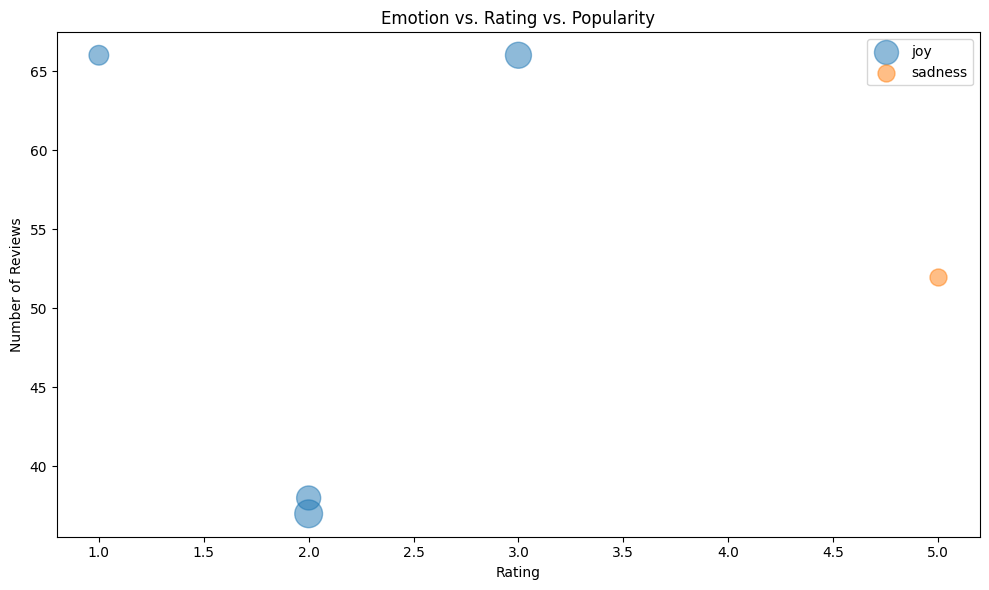

In [8]:
# 6. Bubble Chart of Emotion vs. Rating vs. Popularity
# Assuming we have additional columns 'rating' and 'num_reviews'

# Before plotting, ensure your DataFrame has 'rating' and 'num_reviews' columns.
# If they don't exist, create them with placeholder or relevant data.

# Example: If you don't have the data, you could create dummy columns
df['rating'] = np.random.randint(1, 6, len(df)) # Replace with your actual rating data
df['num_reviews'] = np.random.randint(10, 100, len(df))  # Replace with your actual review count data

df['overall_sentiment'] = df[['joy', 'sadness', 'anger', 'fear', 'surprise']].idxmax(axis=1)
plt.figure(figsize=(10, 6))
for emotion in df['overall_sentiment'].unique():
    data = df[df['overall_sentiment'] == emotion]
    # Accessing the newly created or existing columns:
    plt.scatter(data['rating'], data['num_reviews'], s=data['joy']*500,
                alpha=0.5, label=emotion)
plt.title('Emotion vs. Rating vs. Popularity')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:

# 7. Sunburst Chart of Nested Emotions
# This requires plotly library
import plotly.graph_objects as go

labels = ["Joy", "Excitement", "Happiness", "Sadness", "Grief", "Melancholy",
          "Anger", "Rage", "Frustration", "Fear", "Terror", "Anxiety"]
parents = ["", "Joy", "Joy", "", "Sadness", "Sadness",
           "", "Anger", "Anger", "", "Fear", "Fear"]
values = [10, 5, 5, 8, 4, 4, 6, 3, 3, 4, 2, 2]

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
))
fig.update_layout(title_text="Sunburst Chart of Nested Emotions")
fig.show()


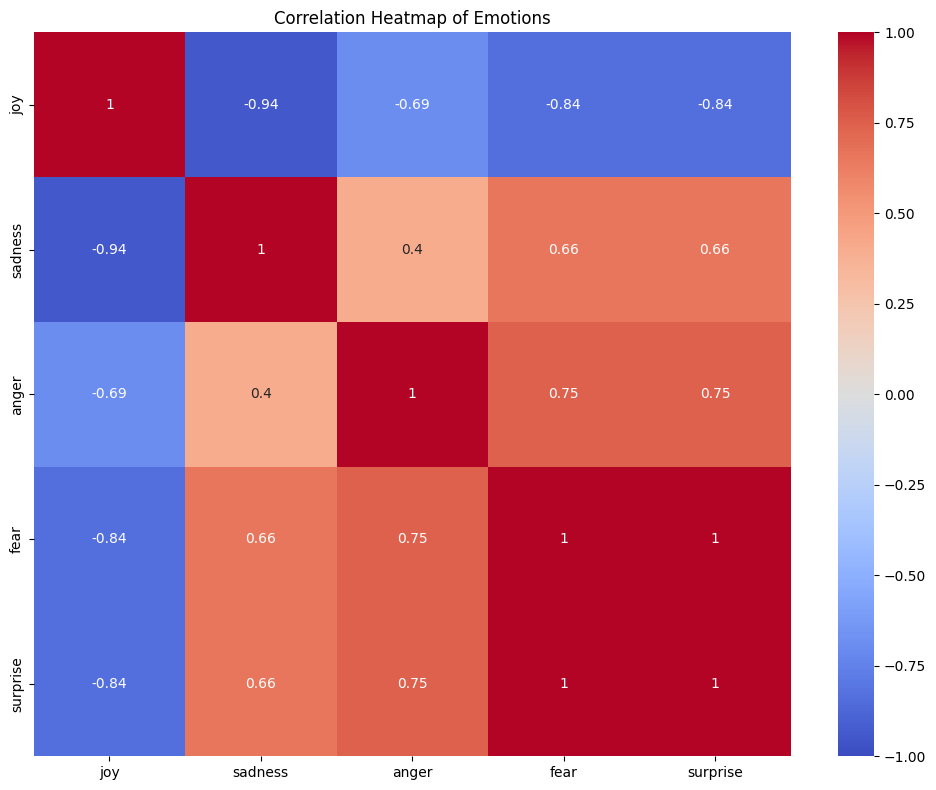

In [10]:
# 8. Correlation Heatmap of Emotions
plt.figure(figsize=(10, 8))
sns.heatmap(df[['joy', 'sadness', 'anger', 'fear', 'surprise']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Emotions')
plt.tight_layout()
plt.show()


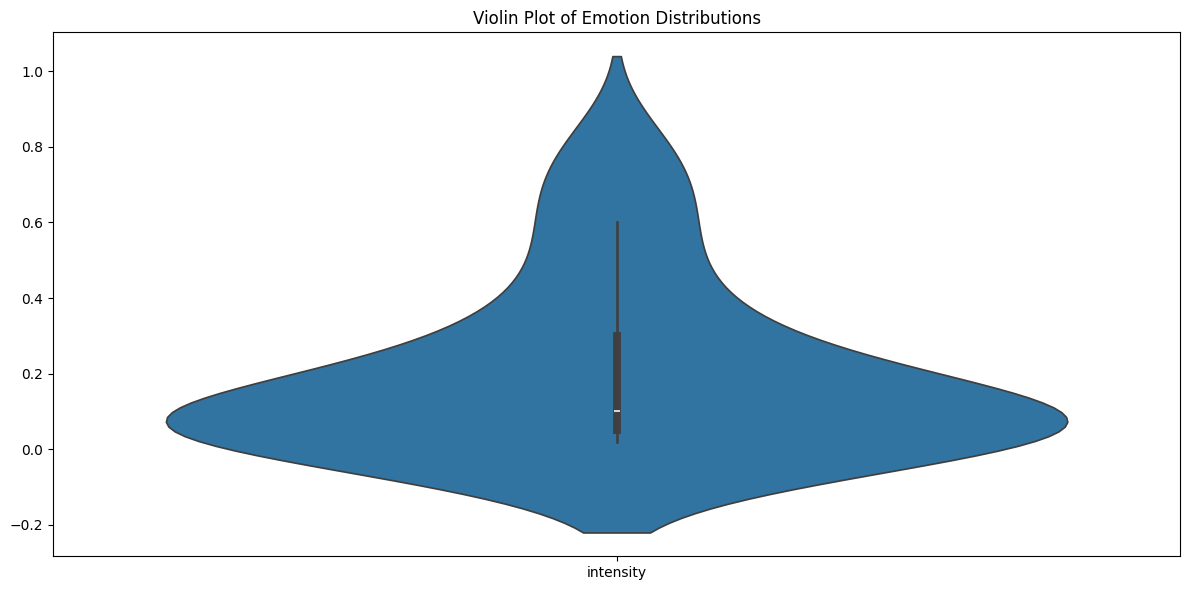

In [13]:
# 10. Violin Plot of Emotion Distributions
plt.figure(figsize=(12, 6))
sns.violinplot(data=df.melt(id_vars=['movie'],
                            value_vars=['joy', 'sadness', 'anger', 'fear', 'surprise'],
                            var_name='emotion', value_name='intensity'))
plt.title('Violin Plot of Emotion Distributions')
plt.tight_layout() # Corrected the typo here: tight_layout()